In [3]:
!pip install folium

In [4]:
!pip install opendatasets

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
import warnings
from datetime import datetime
import calendar
from math import sin, cos, sqrt, atan2, radians
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
import matplotlib.dates as mdates
import matplotlib as mpl
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer as Imputer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
import zipfile

In [6]:
import matplotlib
import plotly.express as px
from matplotlib.dates import DateFormatter

In [7]:
import opendatasets as od

In [8]:
import random

In [9]:
dataset_url = "https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview"

In [10]:
!mkdir ~/.kaggle

mkdir: /Users/akiffwasek/.kaggle: File exists


In [11]:
!cp /Users/akiffwasek/Downloads/kaggle.json /Users/akiffwasek/.kaggle/kaggle.json

In [12]:
!cd /Users/akiffwasek/.kaggle && ls

kaggle.json


In [24]:
!kaggle competitions download -c new-york-city-taxi-fare-prediction --force

100%|███████████████████████████████████████| 1.56G/1.56G [33:10<00:00, 189kB/s]
100%|███████████████████████████████████████| 1.56G/1.56G [33:10<00:00, 841kB/s]


In [25]:
# Helper function to unzip many ".zip" files in a directory

#from zipfile import ZipFile

#def unzip_files(path):
    
    # Get list of files in the directory
  #  files = os.listdir(path)
    
  #  for file in files:                                   #For each file in the directory
        
  #         if file.endswith(".zip"):                        # if it is a ".zip" file
  #           file_path = path+"/"+file                    # get location of the file
  #          
  #          with ZipFile(file_path,"r") as zip_file:     #Open the ".zip" file in read mode
  #              zip_file.extractall(path)                #extract all files in ".zip" in the location
    
  #  return     

In [13]:
ls -lh

total 14403216
-rw-r--r--  1 akiffwasek  staff   486B 12 Dec  2019 GCP-Coupons-Instructions.rtf
-rw-r--r--  1 akiffwasek  staff   348K 18 Nov 15:08 NYC Taxi_EDA.ipynb
-rw-r--r--  1 akiffwasek  staff   455K 18 Nov 12:43 linreg_submission.csv
-rw-r--r--  1 akiffwasek  staff   1.6G  2 Nov 20:46 new-york-city-taxi-fare-prediction.zip
-rw-r--r--  1 akiffwasek  staff   335K 12 Dec  2019 sample_submission.csv
-rw-r--r--  1 akiffwasek  staff   960K 12 Dec  2019 test.csv
-rw-r--r--  1 akiffwasek  staff   5.3G 12 Dec  2019 train.csv


In [14]:
import os

In [32]:
!sudo apt-get install unzip

Password:


In [33]:
!unzip new-york-city-taxi-fare-prediction.zip

Archive:  new-york-city-taxi-fare-prediction.zip
  inflating: GCP-Coupons-Instructions.rtf  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [15]:
ls

GCP-Coupons-Instructions.rtf            sample_submission.csv
NYC Taxi_EDA.ipynb                      test.csv
linreg_submission.csv                   train.csv
new-york-city-taxi-fare-prediction.zip


In [16]:
!ls -lh

total 14403216
-rw-r--r--  1 akiffwasek  staff   486B 12 Dec  2019 GCP-Coupons-Instructions.rtf
-rw-r--r--  1 akiffwasek  staff   348K 18 Nov 15:08 NYC Taxi_EDA.ipynb
-rw-r--r--  1 akiffwasek  staff   455K 18 Nov 12:43 linreg_submission.csv
-rw-r--r--  1 akiffwasek  staff   1.6G  2 Nov 20:46 new-york-city-taxi-fare-prediction.zip
-rw-r--r--  1 akiffwasek  staff   335K 12 Dec  2019 sample_submission.csv
-rw-r--r--  1 akiffwasek  staff   960K 12 Dec  2019 test.csv
-rw-r--r--  1 akiffwasek  staff   5.3G 12 Dec  2019 train.csv


In [18]:
# Training set

!head train.csv

In [20]:
# Test Set

!head test.csv

In [21]:
# Sample submission file

!head sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [22]:
# Number of lines in training set

!wc -l train.csv

 55423856 train.csv


In [23]:
# Number of lines in test set

!wc -l test.csv

    9914 test.csv


In [24]:
# Number of lines in submission file

!wc -lc sample_submission.csv

    9915  343271 sample_submission.csv


- The Training dataset is 5.5GB is size
- Training dataset has 55 million rows
- Test set is less than 1K rows
- Training set has fair_amount column but all the other columns are same in the test set

In [25]:
sample_frac = 0.01

In [26]:
%%time

selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')

dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac


random.seed(42)


df = pd.read_csv('train.csv', 
                 usecols=selected_cols, 
                 dtype=dtypes, 
                 parse_dates=['pickup_datetime'], 
                 skiprows=skip_row)

CPU times: user 1min 32s, sys: 3.07 s, total: 1min 35s
Wall time: 1min 44s


In [27]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1.0
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766963,3.0
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1.0
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602893,1.0
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740142,1.0
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0


In [28]:
test_df = pd.read_csv('test.csv', dtype= dtypes, parse_dates=['pickup_datetime'])

In [29]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float64            
 6   passenger_count    552450 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 19.0 MB


In [31]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354463,-72.288383,39.830513,-72.295395,39.934257,1.684983
std,9.810809,11.622035,8.041162,12.065184,9.255058,1.341986
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733988,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753102,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768060,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403027,208.000000


In [32]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

Observations about training data:

- 550k+ rows, as expected
- No missing data (in the sample)
- fare_amount ranges from −52.0 to 499.0
- passenger_count ranges from 0 to 208
- There seem to be some errors in the latitude & longitude values
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~19 MB of space in the RAM

We may need to deal with outliers and data entry errors before we train our model.

## TEST Set

In [33]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(1)
memory usage: 387.4+ KB


In [34]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.976181,40.750954,-73.974945,40.751743,1.671273
std,0.042799,0.033542,0.039093,0.035435,1.278756
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


In [35]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Observations from the test dataset:

- There are 9914 rows
- No missing data
- passengers count ranges from 1 to 6
- Latitudes lie between 40 to 42
- Longitudes lie between -74 to -72
- Pickup dates range from 1 Jan 2009 to 30 June 2015

We can use the ranges of the test set to drop outliers/invalid data from the training set.

In [36]:
def add_dateparts(df, col):
    df['year'] = df[col].dt.year
    df['month'] = df[col].dt.month
    df['day'] = df[col].dt.day
    df['weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [37]:
%%time
add_dateparts(df, 'pickup_datetime')

CPU times: user 130 ms, sys: 7.24 ms, total: 137 ms
Wall time: 144 ms


In [38]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,pickup_datetime_hour
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1.0,2014,12,6,5,20
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0,2013,1,17,3,17
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766963,3.0,2011,6,15,2,18
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0,2009,12,14,0,12
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1.0,2013,11,6,2,11


## Removing Outliers

We'll use the following ranges:

- fare_amount: 1 to 500
- longitudes: -75 to -72
- latitudes: 40 to 42
- passenger_count: 1 to 6

In [39]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [40]:
%%time
df = remove_outliers(df)

CPU times: user 47.9 ms, sys: 21.6 ms, total: 69.4 ms
Wall time: 80.6 ms


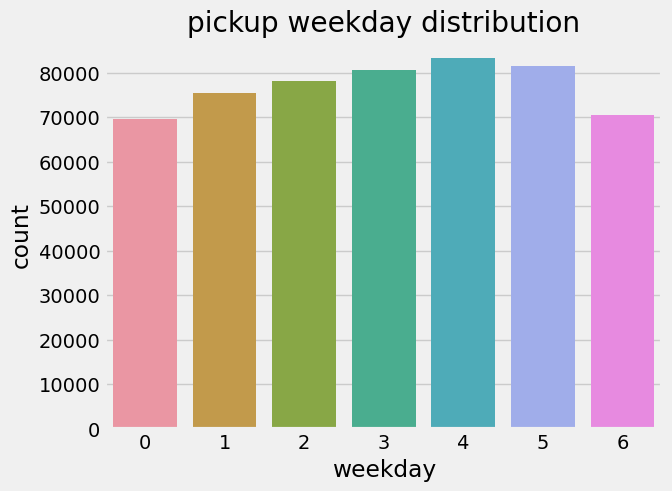

In [41]:
# What is the busiest day of the week?

sns.countplot(x = df['weekday']).set_title('pickup weekday distribution')
plt.show()

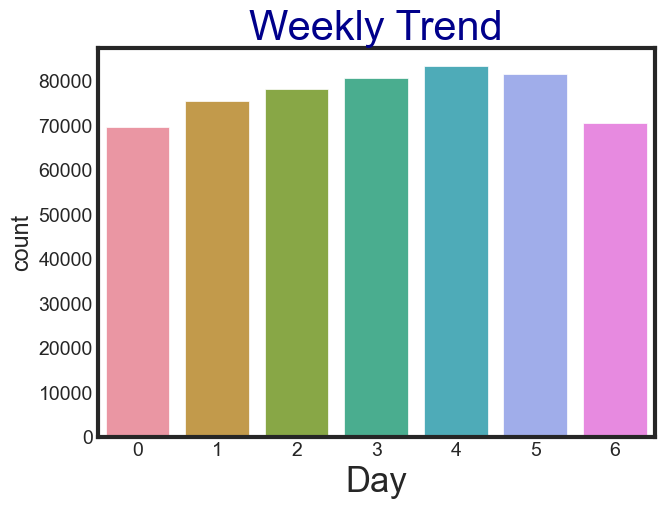

In [42]:
sns.set_style("white",{"axes.facecolor":"white"})

sns.countplot(x= 'weekday', data = df)
plt.title("Weekly Trend", fontsize= 30, color= "DarkBlue")
plt.xlabel('Day', fontsize= 25)
plt.show()

In [43]:
df.weekday.mode()

0    4
dtype: int64

In [44]:
df.pickup_datetime_hour.mode()

0    19
dtype: int64

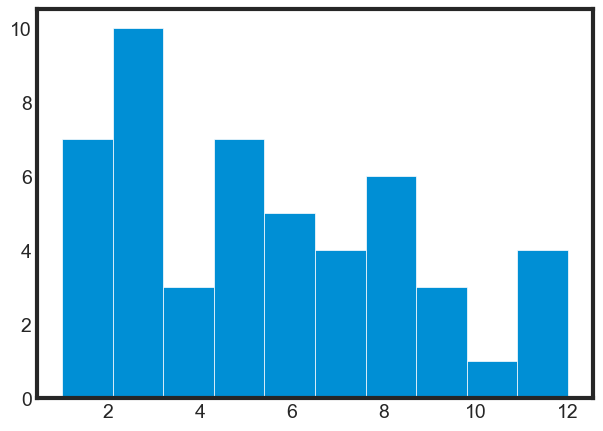

In [45]:
df_fare = df.sort_values(ascending=False, by= 'fare_amount').head(50)
plt.hist(df_fare.month)
plt.show()

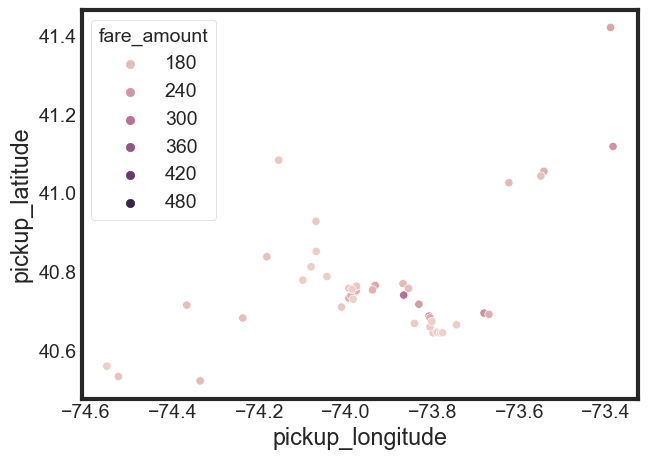

In [46]:
b_plot = sns.scatterplot(data= df_fare, x='pickup_longitude', y= 'pickup_latitude', hue= 'fare_amount')
plt.show()

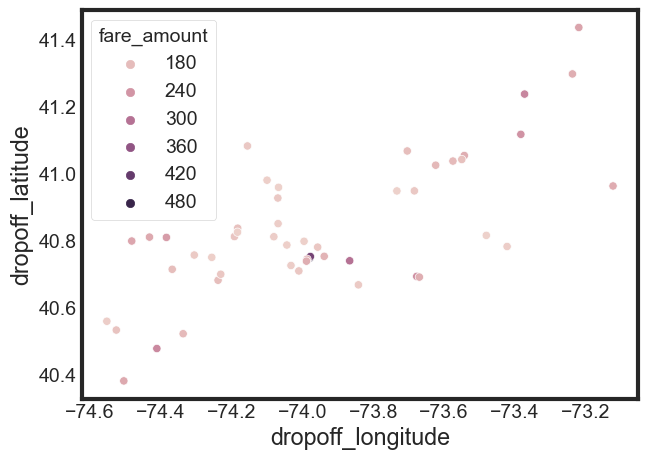

In [47]:
a_plot = sns.scatterplot(x='dropoff_longitude', y= 'dropoff_latitude',hue='fare_amount',data=df_fare)
plt.show()

## Prepare Dataset for Training

- Split Training & Validation set
- Fill/Remove Missiing Values
- Extract Inputs & Outputs: 
      -- Training
      -- Validatiion
      -- Test

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
train_df, val_df = train_test_split(df, test_size= 0.2, random_state= 42 )

In [50]:
len(train_df), len(val_df)

(431072, 107768)

In [51]:
## Remove Null Values

train_df = train_df.dropna()
val_df = val_df.dropna()

In [52]:
# Extract Inputs and Outputs

df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'weekday', 'pickup_datetime_hour'],
      dtype='object')

In [53]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [54]:
target_col = 'fare_amount'

In [55]:
train_inputs = train_df[input_cols]

In [56]:
train_targets = train_df[target_col]

In [57]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
97996,-73.981339,40.747112,-73.986038,40.761682,1.0
24939,-73.993408,40.721783,-73.951218,40.774362,1.0
103945,-74.001640,40.735973,-73.982849,40.776028,2.0
468460,-73.960411,40.778698,-73.953850,40.778727,1.0
332404,-73.998703,40.734863,-73.974426,40.761554,1.0
...,...,...,...,...,...
113003,-73.982864,40.762505,-73.993523,40.752334,2.0
265659,-73.959106,40.809608,-73.978371,40.766917,1.0
375012,-73.982201,40.776855,-73.991417,40.749823,2.0
135184,-74.001434,40.730949,-73.956467,40.775007,2.0


In [58]:
train_targets

97996     7.3 
24939     15.0
103945    12.5
468460    4.1 
332404    10.9
          ... 
113003    4.9 
265659    11.7
375012    9.3 
135184    13.7
124971    5.3 
Name: fare_amount, Length: 431072, dtype: float32

In [59]:
val_inputs = val_df[input_cols]

In [60]:
val_targets = val_df[target_col]

In [61]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
138985,-73.988091,40.758911,-73.982788,40.782118,1.0
115859,-73.954468,40.789360,-73.945244,40.802702,2.0
352143,-74.003998,40.707363,-73.960571,40.812355,3.0
339828,-73.967766,40.802422,-73.950272,40.802175,6.0
98587,-73.991814,40.750168,-73.984535,40.752948,1.0
...,...,...,...,...,...
461175,-74.004211,40.738056,-74.001198,40.731024,1.0
196275,-73.989449,40.741711,-74.006966,40.706005,5.0
14776,-73.959274,40.772045,-73.949448,40.781805,2.0
63318,-73.983528,40.746555,-73.979774,40.743295,1.0


In [62]:
val_targets

138985    7.3 
115859    6.5 
352143    24.9
339828    7.0 
98587     5.7 
         ...  
461175    5.7 
196275    11.5
14776     5.0 
63318     3.7 
118806    18.5
Name: fare_amount, Length: 107768, dtype: float32

In [63]:
test_inputs = test_df[input_cols]

In [64]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


### Train & Evaluate Hardcoded Model

In [65]:
import numpy as np

In [66]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()
        
    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [67]:
mean_model = MeanRegressor()

In [68]:
mean_model.fit(train_inputs, train_targets)

In [69]:
mean_model.mean

11.34741497039795

In [70]:
train_preds = mean_model.predict(train_inputs)

In [71]:
train_preds

array([11.34741497, 11.34741497, 11.34741497, ..., 11.34741497,
       11.34741497, 11.34741497])

In [72]:
val_preds = mean_model.predict(val_inputs)

In [73]:
val_preds

array([11.34741497, 11.34741497, 11.34741497, ..., 11.34741497,
       11.34741497, 11.34741497])

In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
train_rmse = mean_squared_error(train_targets, train_preds, squared= False)

In [76]:
train_rmse

9.738458185675844

In [77]:
val_rmse = mean_squared_error(val_targets, val_preds, squared= False)

In [78]:
val_rmse

9.68148640432986

### Train & Evaluate Baseline Model

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
linreg_model = LinearRegression()

In [81]:
linreg_model.fit(train_inputs, train_targets)

LinearRegression()

In [82]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([ 9.93344236, 11.64891291,  8.49441854, ...,  8.37935818,
       10.19509672,  7.06226221])

In [83]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([ 7.84250629,  9.78286396,  9.5818972 , ..., 11.21892209,
       10.95580453, 10.25720251])

In [84]:
train_rmse = mean_squared_error(train_targets, train_preds, squared= False)
train_rmse

8.471410402777355

In [85]:
val_rmse = mean_squared_error(val_targets, val_preds, squared= False)
val_rmse

8.472141709771805

### Make Predictions and Submit to Kaggle

In [86]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [87]:
test_preds = linreg_model.predict(test_inputs)

In [88]:
submission_df = pd.read_csv('sample_submission.csv')

In [89]:
submission_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [90]:
def generate_submission(test_preds, fname):
    sub_df = pd.read_csv('sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)

In [91]:
generate_submission(test_preds, 'linreg_submission.csv')

### Feature Engineering

- Extract parts of date
- Remove outliers & invalid data
- Add distance between pickup & drop
- Add distance from landmarks

### Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour

In [92]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [93]:
add_dateparts(train_df, 'pickup_datetime')

In [94]:
add_dateparts(val_df, 'pickup_datetime')

In [95]:
add_dateparts(test_df, 'pickup_datetime')

In [96]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,pickup_datetime_hour,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday
97996,7.3,2012-06-15 22:06:27+00:00,-73.981339,40.747112,-73.986038,40.761682,1.0,2012,6,15,4,22,2012,6,15,4
24939,15.0,2014-03-05 22:45:00+00:00,-73.993408,40.721783,-73.951218,40.774362,1.0,2014,3,5,2,22,2014,3,5,2
103945,12.5,2011-02-19 22:58:52+00:00,-74.001640,40.735973,-73.982849,40.776028,2.0,2011,2,19,5,22,2011,2,19,5
468460,4.1,2012-07-14 16:38:00+00:00,-73.960411,40.778698,-73.953850,40.778727,1.0,2012,7,14,5,16,2012,7,14,5
332404,10.9,2009-12-24 14:56:47+00:00,-73.998703,40.734863,-73.974426,40.761554,1.0,2009,12,24,3,14,2009,12,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113003,4.9,2011-03-29 02:33:40+00:00,-73.982864,40.762505,-73.993523,40.752334,2.0,2011,3,29,1,2,2011,3,29,1
265659,11.7,2009-04-29 00:06:00+00:00,-73.959106,40.809608,-73.978371,40.766917,1.0,2009,4,29,2,0,2009,4,29,2
375012,9.3,2009-06-09 22:39:51+00:00,-73.982201,40.776855,-73.991417,40.749823,2.0,2009,6,9,1,22,2009,6,9,1
135184,13.7,2010-08-02 21:28:00+00:00,-74.001434,40.730949,-73.956467,40.775007,2.0,2010,8,2,0,21,2010,8,2,0


### Add Distance Between Pickup and Drop

In [97]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [98]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [99]:
%%time
add_trip_distance(train_df)

CPU times: user 29.5 ms, sys: 9.38 ms, total: 38.9 ms
Wall time: 38.4 ms


In [100]:
add_trip_distance(val_df)

In [101]:
add_trip_distance(test_df)

In [102]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,pickup_datetime_hour,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,trip_distance
503929,8.5,2011-10-30 20:11:20+00:00,-73.979309,40.727535,-74.001953,40.745038,1.0,2011,10,30,6,20,2011,10,30,6,2.723696
120048,4.9,2011-08-07 13:50:00+00:00,-73.981842,40.773216,-73.991241,40.765652,1.0,2011,8,7,6,13,2011,8,7,6,1.154287
241020,9.5,2014-07-01 18:39:00+00:00,-73.976013,40.749657,-73.952072,40.769302,1.0,2014,7,1,1,18,2014,7,1,1,2.970940
228633,8.5,2014-09-14 19:42:00+00:00,-73.976837,40.761600,-73.989067,40.738847,2.0,2014,9,14,6,19,2014,9,14,6,2.730011
364446,8.1,2010-03-29 12:31:30+00:00,-73.968727,40.750416,-73.982216,40.763031,1.0,2010,3,29,0,12,2010,3,29,0,1.804149


### Add Distance From Popular Landmarks

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Museum 
- World Trade Center

In [103]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [104]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [105]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: user 146 ms, sys: 22.3 ms, total: 169 ms
Wall time: 180 ms


In [106]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,...,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
533199,10.5,2014-08-31 04:01:00+00:00,-73.992706,40.724045,-73.972298,40.695312,2.0,2014,8,31,...,2014,8,31,6,3.626178,17.434104,12.276047,17.049726,9.375589,3.705094
455357,7.3,2010-08-13 09:35:46+00:00,-74.003754,40.716934,-73.998726,40.734653,2.0,2010,8,13,...,2010,8,13,4,2.014125,21.289334,11.500917,15.633072,5.802364,2.625120
532347,6.5,2014-12-29 22:34:00+00:00,-73.983871,40.760410,-73.977821,40.753102,1.0,2014,12,29,...,2014,12,29,0,0.958700,20.916425,9.129389,18.009541,3.170742,5.249281
285354,7.3,2010-06-19 01:54:21+00:00,-74.005463,40.726303,-74.006554,40.706948,1.0,2010,6,19,...,2010,6,19,5,2.152915,20.590058,13.600677,14.281804,8.839909,0.688449
452299,4.1,2011-04-22 14:21:59+00:00,-73.956902,40.776691,-73.946381,40.772772,1.0,2011,4,22,...,2011,4,22,4,0.986466,20.356898,6.108206,21.322357,1.595800,8.562274


### Remove Outliers and Invalid Data

- Fare amount
- Passenger count
- Pickup latitude & longitude
- Drop latitude & longitude

In [107]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,...,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,431072.000000,431072.000000,431072.000000,431072.000000,431072.000000,431072.000000,431072.000000,431072.000000,431072.000000,431072.000000,...,431072.000000,431072.000000,431072.000000,431072.000000,4.310720e+05,431072.000000,431072.000000,431072.000000,431072.000000,431072.000000
mean,11.347415,-73.998199,40.839939,-73.998314,40.751318,1.689537,2011.737835,6.265334,15.727085,3.037474,...,2011.737835,6.265334,15.727085,3.037474,3.328946e+00,20.914325,9.694424,18.472101,4.495591,5.963722
std,9.736885,0.045736,0.093922,0.045392,0.033151,1.306558,1.863460,3.435738,8.690846,1.950052,...,1.863460,3.435738,8.690846,1.950052,3.746379e+00,3.106583,3.094140,3.765062,3.809559,4.000671
min,1.000000,-74.934593,40.063896,-74.946442,40.054207,1.000000,2009.000000,1.000000,1.000000,0.000000,...,2009.000000,1.000000,1.000000,0.000000,2.828477e-07,0.305535,0.116385,0.129259,0.031095,0.009334
25%,6.000000,-73.992233,40.736549,-73.991631,40.735482,1.000000,2010.000000,3.000000,8.000000,1.000000,...,2010.000000,3.000000,8.000000,1.000000,1.253326e+00,20.520671,8.324476,16.473049,2.140233,3.580354
50%,8.500000,-73.982101,40.753345,-73.980637,40.753777,1.000000,2012.000000,6.000000,16.000000,3.000000,...,2012.000000,6.000000,16.000000,3.000000,2.152249e+00,21.174419,9.524575,17.955460,3.720834,5.487226
75%,12.500000,-73.968353,40.767456,-73.965454,40.768353,2.000000,2013.000000,9.000000,23.000000,5.000000,...,2013.000000,9.000000,23.000000,5.000000,3.913149e+00,21.898163,10.989441,19.782233,5.903126,7.640554
max,499.000000,-72.471581,41.667648,-72.113823,41.683928,6.000000,2015.000000,12.000000,31.000000,6.000000,...,2015.000000,12.000000,31.000000,6.000000,1.134746e+02,141.011909,150.943364,174.761327,158.388180,161.233839


In [108]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.976181,40.750954,-73.974945,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433217,20.916707,9.675209,18.546655,4.512975,6.037621
std,0.042799,0.033542,0.039093,0.035435,1.278756,1.803347,3.353272,8.838482,1.994451,6.868584,3.969883,3.303942,3.295656,4.035818,4.018438,4.252537
min,-74.252190,40.573143,-74.263245,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000009,0.402057,0.285510,0.284706,0.085728,0.040386
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297281,20.513366,8.311562,16.520468,2.126326,3.669914
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215669,21.181394,9.477792,18.024364,3.698360,5.541418
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.042928,21.909781,10.965471,19.880521,5.922760,7.757408
max,-72.986534,41.709557,-72.990967,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933359,134.497657,126.062486,149.400789,130.347048,138.619454


In [109]:
train_df = remove_outliers(train_df)

In [110]:
val_df = remove_outliers(val_df)

----

Train & Evaluate Different Models

- Linear Regression
- Random Forests
- Gradient Boosting

Exercise: Train Ridge, SVM, KNN, Decision Tree models

### Split Inputs & Targets

In [111]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'weekday', 'pickup_datetime_hour',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'trip_distance', 'jfk_drop_distance',
       'lga_drop_distance', 'ewr_drop_distance', 'met_drop_distance',
       'wtc_drop_distance'],
      dtype='object')

In [112]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'pickup_datetime_hour',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'trip_distance', 'jfk_drop_distance',
       'lga_drop_distance', 'ewr_drop_distance', 'met_drop_distance',
       'wtc_drop_distance']

In [113]:
target_col = 'fare_amount'

In [114]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [115]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [116]:
test_inputs = test_df[input_cols]

In [117]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared= False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared= False)
    return train_rmse, val_rmse, train_preds, val_preds

### Ridge Regression

In [118]:
from sklearn.linear_model import Ridge

In [119]:
model1 = Ridge(random_state=42)

In [120]:
%%time
model1.fit(train_inputs, train_targets)

CPU times: user 92.2 ms, sys: 42.8 ms, total: 135 ms
Wall time: 121 ms


Ridge(random_state=42)

In [121]:
evaluate(model1)

(5.099985555851985,
 5.017244294212655,
 array([ 8.17776547, 18.25717457, 12.71974998, ...,  8.81595092,
        14.85926432,  7.09457796]),
 array([ 7.97472317, 10.02257599, 27.78761039, ...,  7.60719645,
         4.25085953, 16.22687312]))

### Random Forest

In [122]:
from sklearn.ensemble import RandomForestRegressor

In [123]:
model2 = RandomForestRegressor(max_depth=10, n_jobs= -1, random_state=42, n_estimators=50)

In [124]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: user 4min 58s, sys: 1.1 s, total: 4min 59s
Wall time: 1min 31s


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [125]:
evaluate(model2)

(3.657864968260025,
 3.9205429695354175,
 array([ 6.91269599, 19.73711273, 12.35879808, ...,  9.39170298,
        14.34199002,  6.19565325]),
 array([ 8.71051934,  7.51705862, 24.02681488, ...,  6.60662354,
         5.06563606, 15.83261036]))

### Gradient Boosting

In [189]:
!pip install xgboost

     |████████████████████████████████| 1.3 MB 1.1 MB/s eta 0:00:01


In [191]:
conda install -c conda-forge xgboost

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    ca-certificates-2021.10.8  |       h033912b_0         139 KB  conda-forge
    certifi-2021.10.8          |   py38h50d1736_1         145 KB  conda-forge
    conda-4.10.3               |   py38h50d1736_3         3.1 MB  conda-forge
    libxgboost-1.3.3           |       h23ab428_0         1.2 MB
    openssl-1.1.1l             |       h0d85af4_0         1.9 MB  conda-forge
    py-xgboost-1.3.3           |   py38hecd8cb5_0         136 KB
    xgboost-1.3.3              |   py38hecd8cb5_0          23 KB
    ------------------------------------------------------------
                                           Total:         6.6 MB

The followin

In [127]:
conda install -c anaconda py-xgboost

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2021.10.~ --> anaconda::ca-certificates-2020.10.14-0
  certifi            conda-forge::certifi-2021.10.8-py38h5~ --> anaconda::certifi-2020.6.20-py38_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [128]:
from xgboost import XGBRegressor

In [129]:
model3 = XGBRegressor(randon_state=42, n_jobs=-1, objective='reg:squarederror')

In [130]:
%%time
model3.fit(train_inputs, train_targets)

[15:25:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { randon_state } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


CPU times: user 3min 17s, sys: 708 ms, total: 3min 18s
Wall time: 53.3 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
             randon_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [131]:
evaluate(model3)

(3.0872405,
 3.7793114,
 array([ 7.136262 , 19.120958 , 11.548635 , ...,  8.697179 , 12.581748 ,
         6.1059904], dtype=float32),
 array([ 8.203697 ,  7.2130895, 25.027363 , ...,  6.3052692,  4.4525485,
        17.92307  ], dtype=float32))

### Tune Hyperparameters

In [135]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [136]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

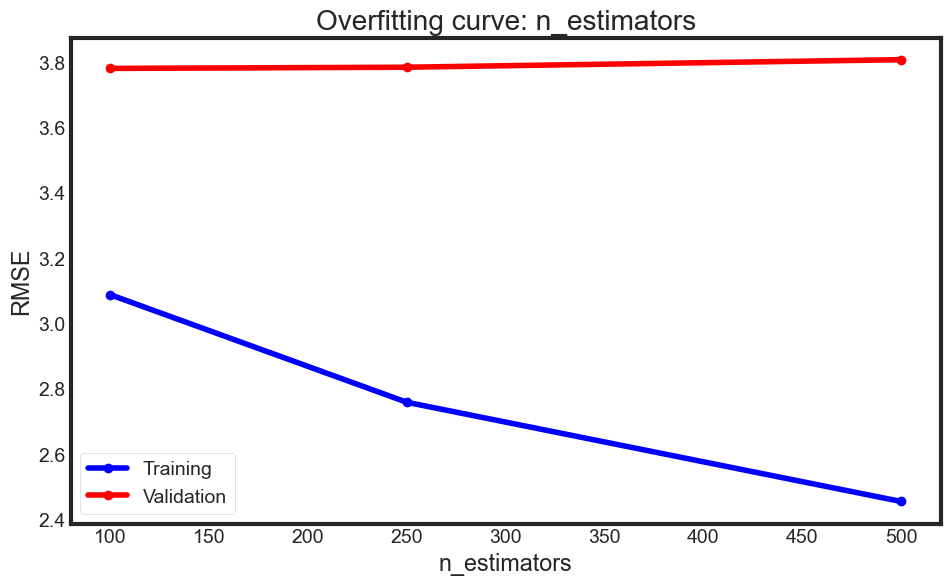

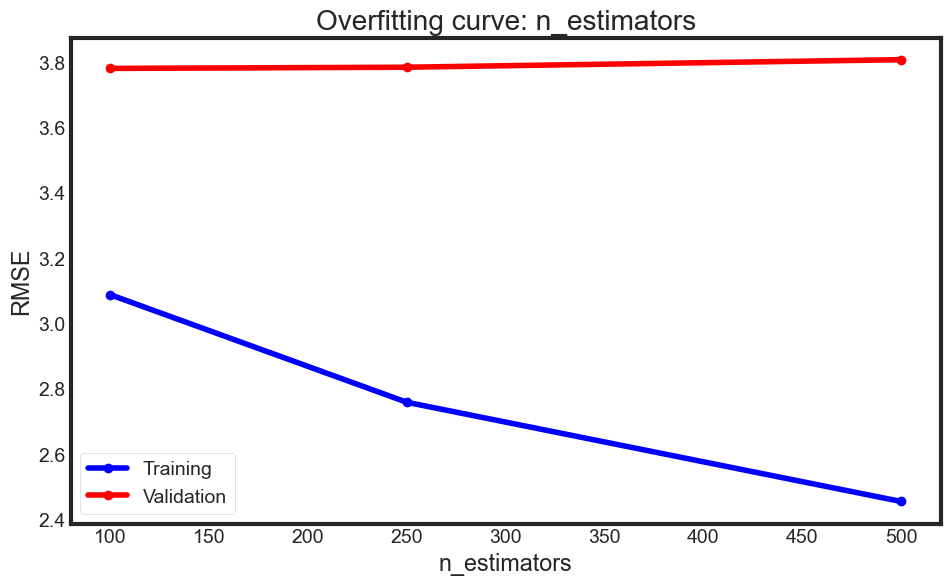

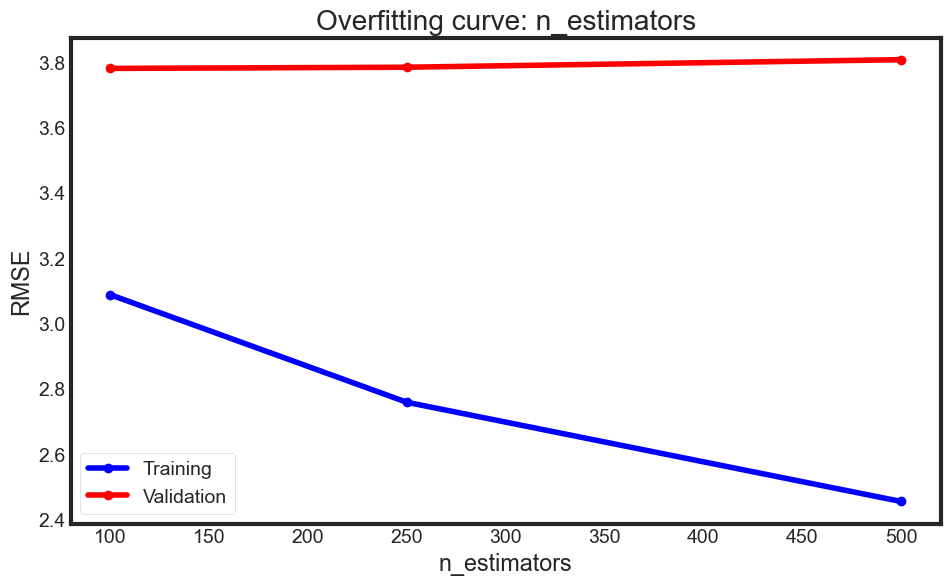

CPU times: user 27min 57s, sys: 4.25 s, total: 28min 2s
Wall time: 7min 16s


In [138]:
%%time 
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)
plt.show()